In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/kc_house_data.csv')

In [6]:
df.isnull().sum() #checking to see if we have null values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
#.isnull() returns True/False for each point in the df, adding .sum()
#returns the sum of null values in each column

In [9]:
df.describe().transpose() 

#transpose is useful bc of how many columns there are

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

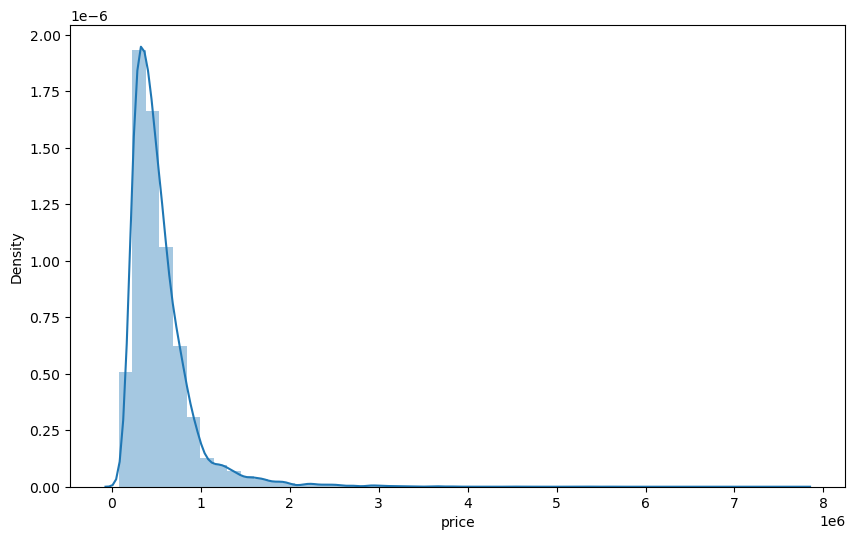

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

In [11]:
#keep in mind we may want to drop extreme outliers ($3 million);
#it may not be useful to train a model on them

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

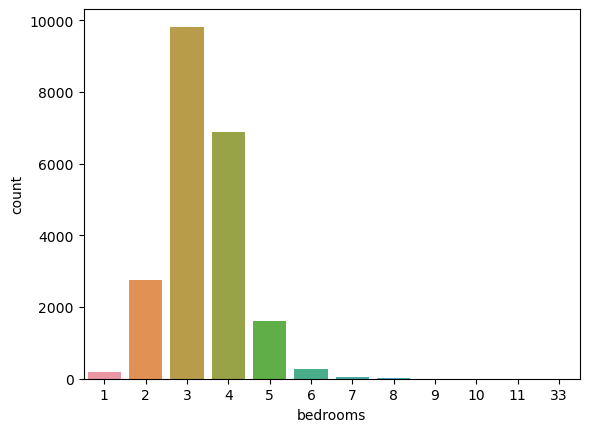

In [12]:
sns.countplot(df['bedrooms'])

In [13]:
#vast majority of houses fall between 2-5 bedrooms, but there is at 
#least one outlier with 33.

In [17]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [18]:
#highly correlated features should be explored with a scatter plot

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

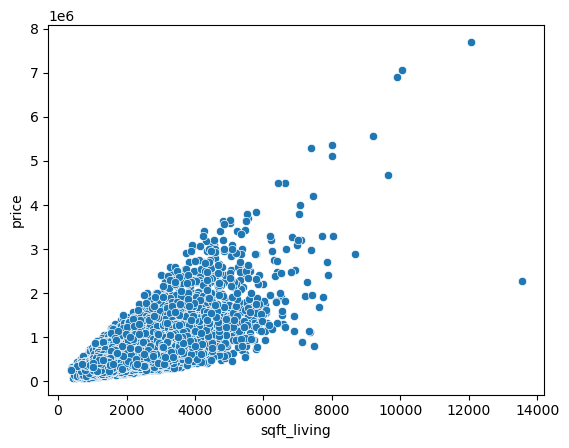

In [19]:
sns.scatterplot(df['sqft_living'],df['price'])

#note the alternate way to document this as opposed to using data=

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

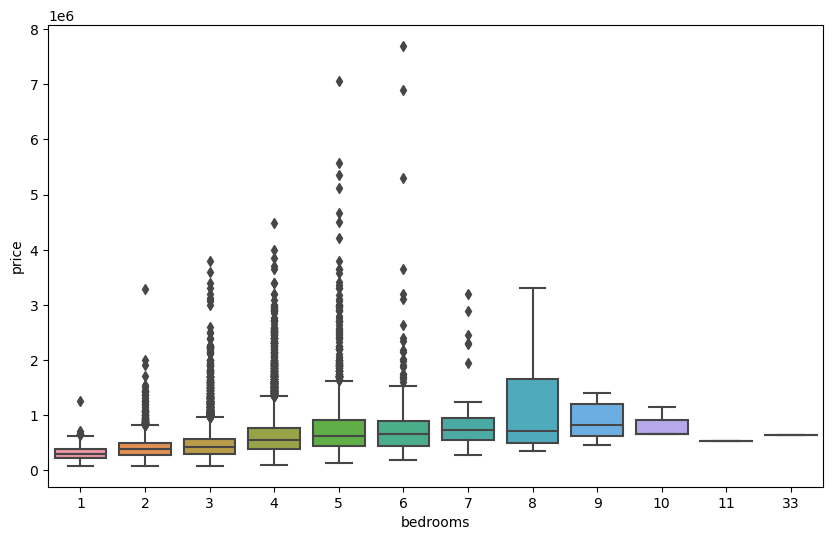

In [21]:
plt.figure(figsize=(10,6))

sns.boxplot(x='bedrooms',y='price',data=df)

In [22]:
#note the variation in the 3-7 bedrooms, this can be explained by the 
#number of datapoints that fall into these categories.

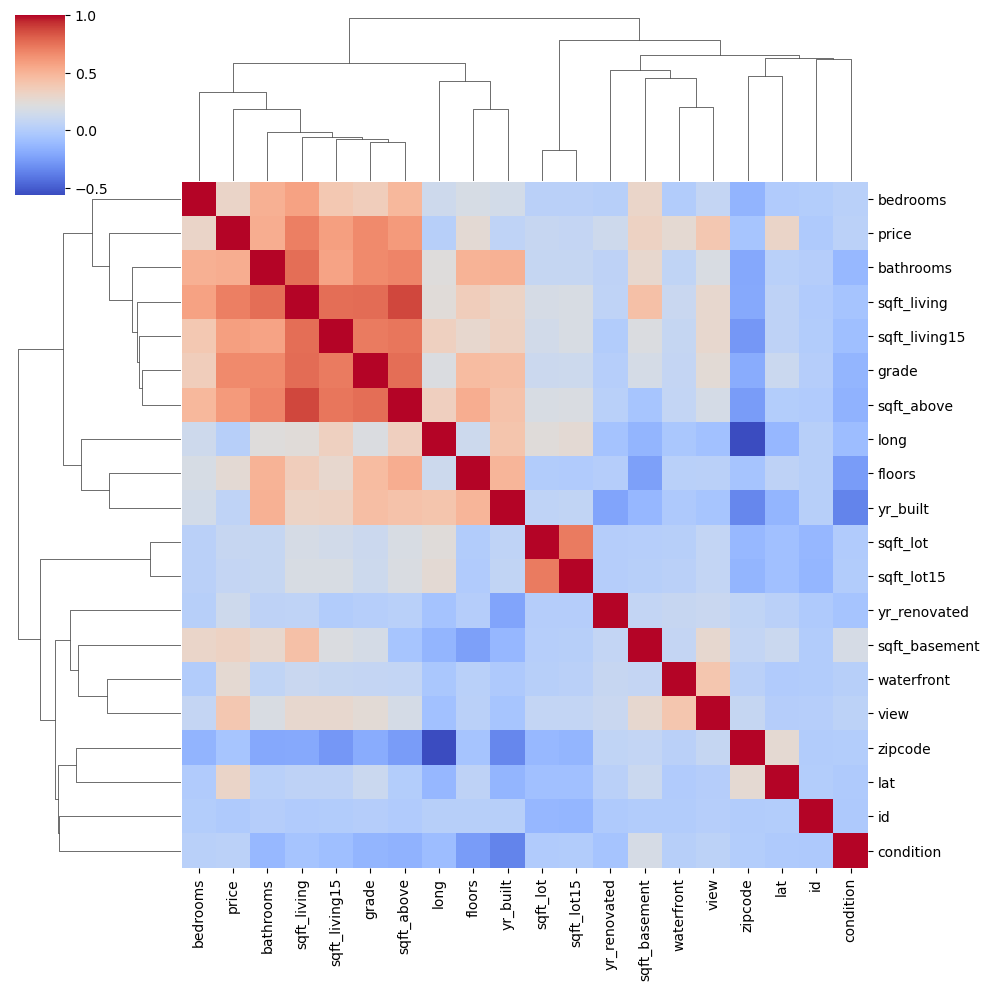

In [25]:
sns.clustermap(df.corr(),cmap = 'coolwarm')

<AxesSubplot:xlabel='price', ylabel='long'>

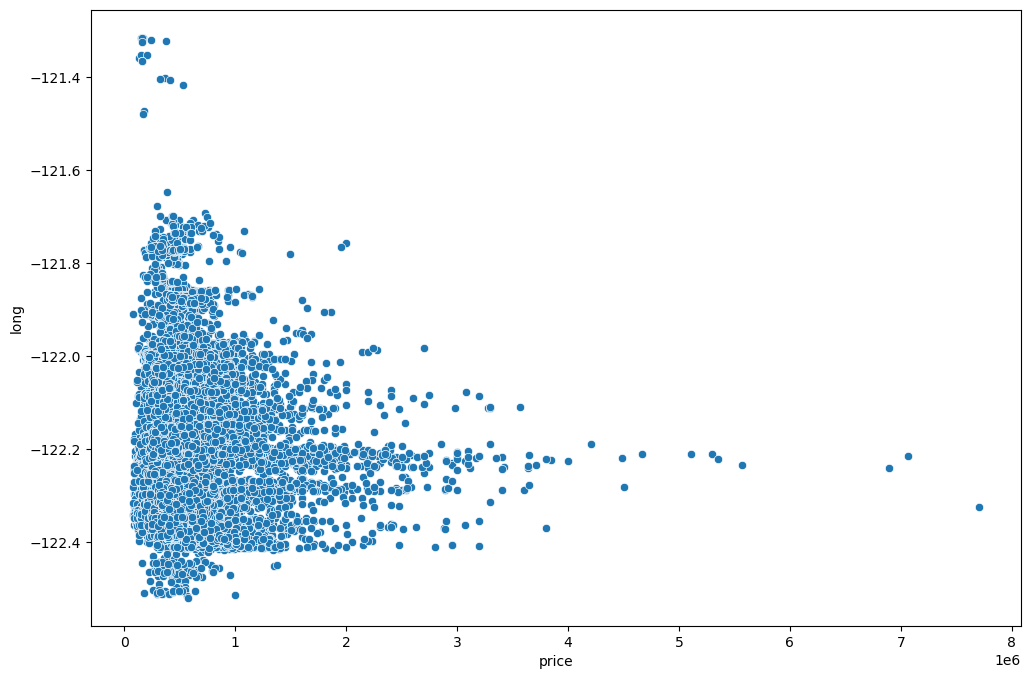

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

In [27]:
#longitude around -122.2 seems to be a more expensive area

<AxesSubplot:xlabel='price', ylabel='lat'>

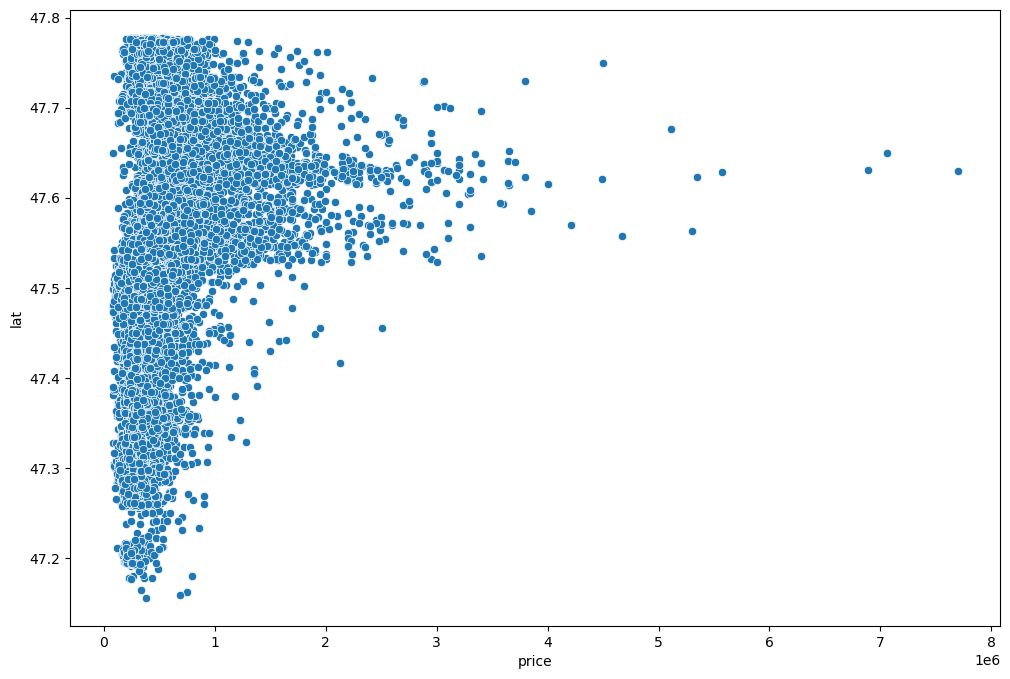

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

In [29]:
#lat between 47.6 and 47.7 seems more expensive

<AxesSubplot:xlabel='long', ylabel='lat'>

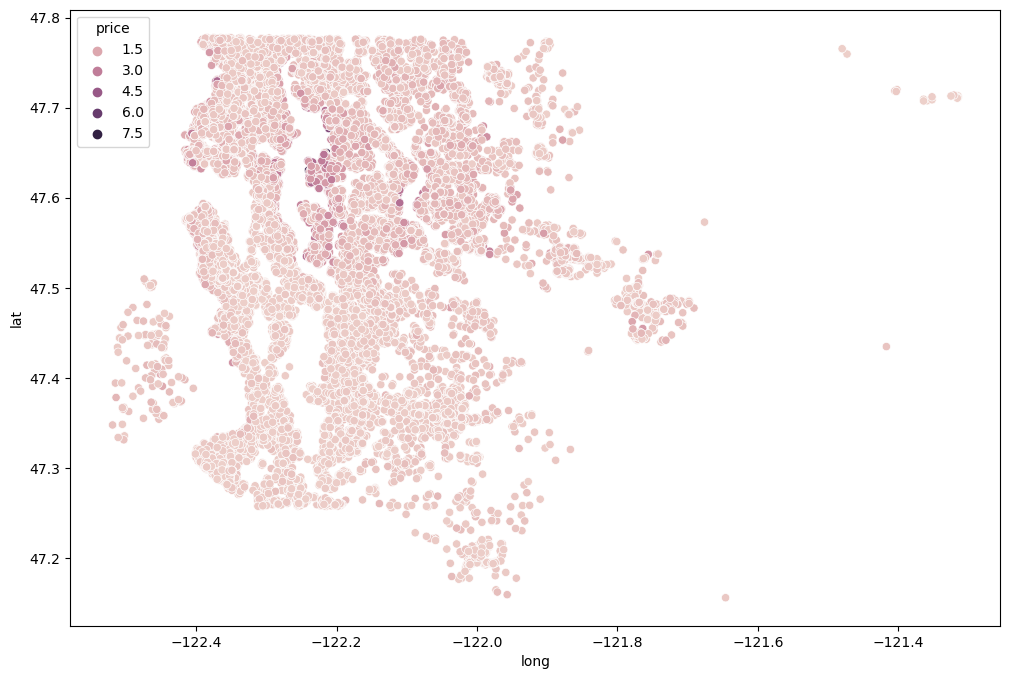

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [34]:
#note that this looks like a map of King County, Seattle. The shape of
#the county and bodies of water are approximately captured.

In [35]:
#outliers make the rest of the map hard to distinguish

In [37]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [38]:
#most expensive is $7.7MM but it quickly drops off. Looking back at the
#original distplot for price confirms essentially anything above $3MM
#is an outlier.

In [40]:
len(df)*.01 #sample out the top 1% of the houses

215.97

In [41]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

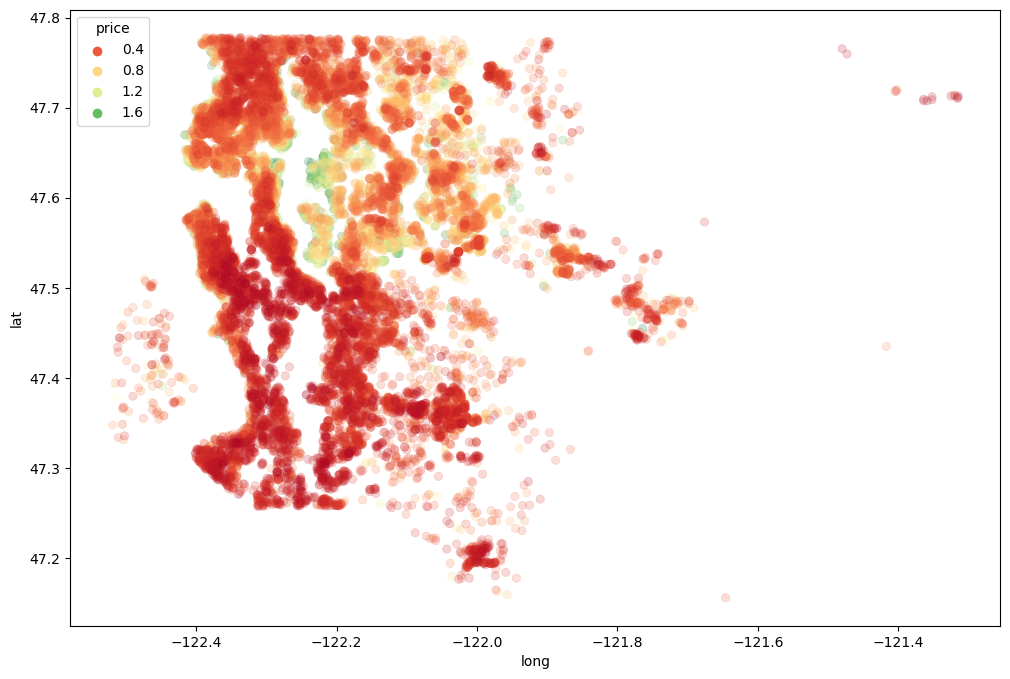

In [47]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price',
               edgecolor=None,alpha=.2,palette='RdYlGn')

In [48]:
#shows the highest valued properties are on the waterfront

<AxesSubplot:xlabel='waterfront', ylabel='price'>

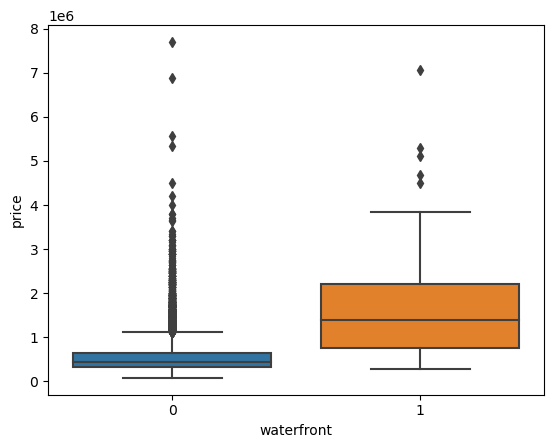

In [49]:
sns.boxplot(x='waterfront',y='price',data=df)

In [50]:
#box plot confirms this

In [51]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [52]:
#id can immediately be dropped

In [136]:
df = df.drop('id',axis=1)

In [137]:
df['date']

6329       6/2/2014
12271    10/15/2014
9166      2/13/2015
12565     4/22/2015
1150      4/21/2015
            ...    
2139       5/8/2014
8267      11/5/2014
16184     3/24/2015
465       5/23/2014
15279      5/6/2014
Name: date, Length: 21381, dtype: object

In [55]:
#currently a string

In [138]:
df['date'] = pd.to_datetime(df['date'])

In [57]:
df['date'] #now a datetime object

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [139]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [59]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

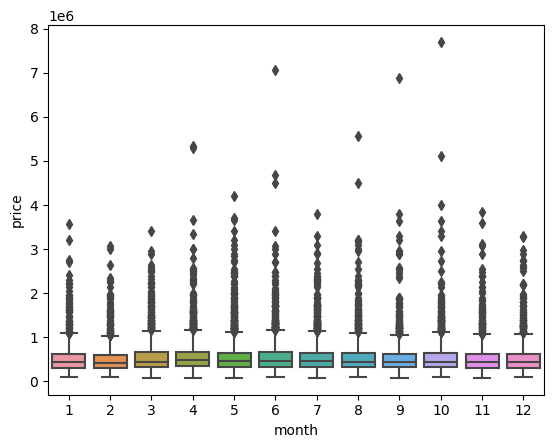

In [60]:
sns.boxplot(x='month',y='price',data=df)

In [62]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

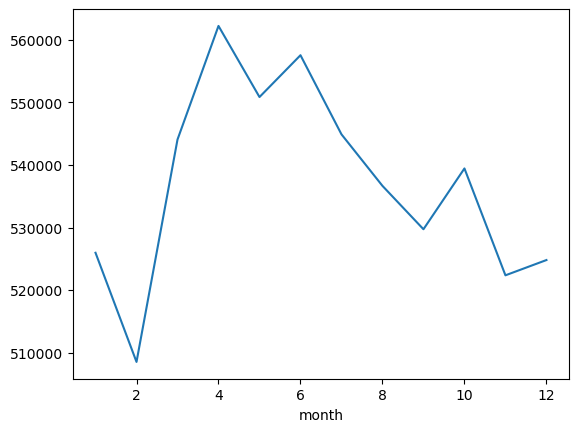

In [63]:
df.groupby('month').mean()['price'].plot()

#shows that there is some behavior difference depending on the month

In [65]:
df.corr()['price'] #corr is not particularly useful because months
#are captured as values

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
year             0.003727
month           -0.009928
Name: price, dtype: float64

<AxesSubplot:xlabel='year'>

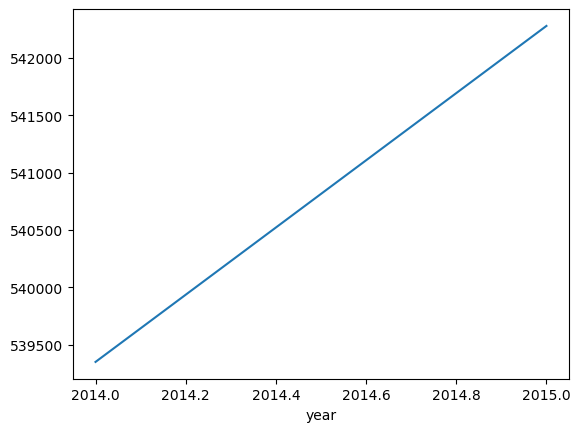

In [66]:
df.groupby('year').mean()['price'].plot()


In [67]:
#price increases as time goes on

In [69]:
df.drop('date',axis=1,inplace=True)

In [70]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [71]:
#model assumes zipcode is a continuous feature; domain experience is
#necessary to explore this

In [72]:
#looking at maps, there is no clear continuous feature, so you want to
#view it as a categorical variable.

In [73]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [74]:
#70 categories is too many to use dummy variables
#Someone with domain experience could sort zipcodes by N,S,E,W etc.

In [144]:
df.drop('zipcode',axis=1,inplace=True)

In [77]:
df['yr_renovated'].value_counts()

#most values are not renovated, but the model will read 0 as being 
#lower than the others. This should possibly be resorted as renovate
#or not renovated. However, more recent renovations should correlate
#with higher value, and 0 corresponds to lowest value


0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

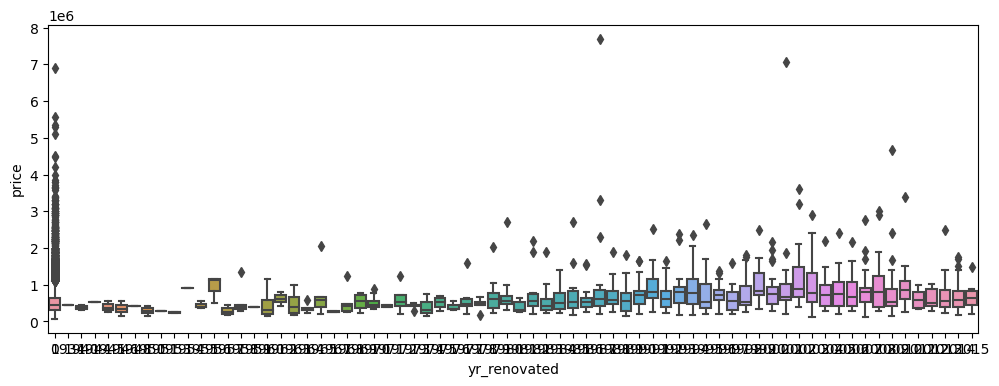

In [80]:
plt.figure(figsize=(12,4))
sns.boxplot(x='yr_renovated',y='price',data=df)

In [82]:
df['sqft_basement'].value_counts()

#0 most likely means there is no basement. This can also be kept as a 
#continuous variable. No basement or a small basement is likely to 
#be correlated with a lower price than a larger basement

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [83]:
X = df.drop('price',axis=1).values
y = df['price'].values

#using .values to ensure there is no issue with the pandas datatypes 
#and numpy numerics

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.3, random_state=101)

In [86]:
#remember that we only want to scale AFTER splitting to prevent
#data leakage from the test set

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler = MinMaxScaler()

In [89]:
X_train = scaler.fit_transform(X_train)

#save some time by using .fit_transform, which fits and transforms in
#one step instead of two.

In [90]:
X_test = scaler.transform(X_test)

#we don't fit to the test set because we don't want to assume prior
#information about it

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [93]:
X_train.shape

#we want to base the number of neurons on the size of the data

(15117, 19)

In [95]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [97]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
         batch_size=128, epochs=400)

#validation data means that after each epoch of training it will quickly
#run the test data and check our loss against it as well.
#Keras will not update the model based on the test data.

#this is also where it is important to make sure you are passing an np
#array and not a dataframe (using .values)

#batch size means that you're not passing in the entire training data
#at once, and it is typically done in powers of 2

Epoch 1/400
119/119 [==============================] - 1s 2ms/step - loss: 430246068224.0000 - val_loss: 418958737408.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 429931429888.0000 - val_loss: 417937489920.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 426116612096.0000 - val_loss: 409264455680.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 406038151168.0000 - val_loss: 373503590400.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 345398247424.0000 - val_loss: 286731206656.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 236026003456.0000 - val_loss: 167799930880.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 134390644736.0000 - val_loss: 103348920320.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 101454323712.0000 - val_loss: 95231713280.0000
Epoch 9/400
119/1

119/119 [==============================] - 0s 2ms/step - loss: 40572866560.0000 - val_loss: 39292223488.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 40392953856.0000 - val_loss: 39082061824.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 40158961664.0000 - val_loss: 38873554944.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 39980826624.0000 - val_loss: 38676652032.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 39748648960.0000 - val_loss: 38478192640.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 39532281856.0000 - val_loss: 38395346944.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 39360122880.0000 - val_loss: 38049996800.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 39131037696.0000 - val_loss: 37859377152.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 34337927168.0000 - val_loss: 33091180544.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 34267275264.0000 - val_loss: 33033889792.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 34248454144.0000 - val_loss: 33017131008.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 34183233536.0000 - val_loss: 32963702784.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 34159679488.0000 - val_loss: 32922081280.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 34124898304.0000 - val_loss: 32914700288.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 34090801152.0000 - val_loss: 32841172992.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 34065516544.0000 - val_loss: 32832083968.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 32472924160.0000 - val_loss: 31011563520.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 32435529728.0000 - val_loss: 30987038720.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 32411435008.0000 - val_loss: 31092549632.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 32455327744.0000 - val_loss: 30990239744.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 32397078528.0000 - val_loss: 30947840000.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 32375050240.0000 - val_loss: 30903042048.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 32350318592.0000 - val_loss: 30879574016.0000
Epoch 208/400
119/119 [==============================] - 0s 1ms/step - loss: 32375132160.0000 - val_loss: 30852700160.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 31385778176.0000 - val_loss: 29621569536.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 31357853696.0000 - val_loss: 29606197248.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 31336978432.0000 - val_loss: 29615443968.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 31358625792.0000 - val_loss: 29586014208.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 31330009088.0000 - val_loss: 29701171200.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 31334182912.0000 - val_loss: 29566961664.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 31316523008.0000 - val_loss: 29516914688.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 31291353088.0000 - val_loss: 29522491392.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30719748096.0000 - val_loss: 28914276352.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 30721273856.0000 - val_loss: 28750196736.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 30746621952.0000 - val_loss: 28766023680.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 30707781632.0000 - val_loss: 28727732224.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 30671161344.0000 - val_loss: 28732715008.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 30660081664.0000 - val_loss: 28701140992.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 30662092800.0000 - val_loss: 28697145344.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 30637899776.0000 - val_loss: 28677238784.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30248577024.0000 - val_loss: 28136247296.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 30260199424.0000 - val_loss: 28147777536.0000


In [103]:
losses=pd.DataFrame(model.history.history)
losses
#because the validation_data tuple was passed, we get val_loss, which
#represents the loss on the test set

,loss,val_loss
0,4.302461e+11,4.189587e+11
1,4.299314e+11,4.179375e+11
2,4.261166e+11,4.092645e+11
3,4.060382e+11,3.735036e+11
4,3.453982e+11,2.867312e+11
...,...,...
395,3.025088e+10,2.817545e+10
396,3.024427e+10,2.814903e+10
397,3.024164e+10,2.815097e+10
398,3.024858e+10,2.813625e+10


<AxesSubplot:>

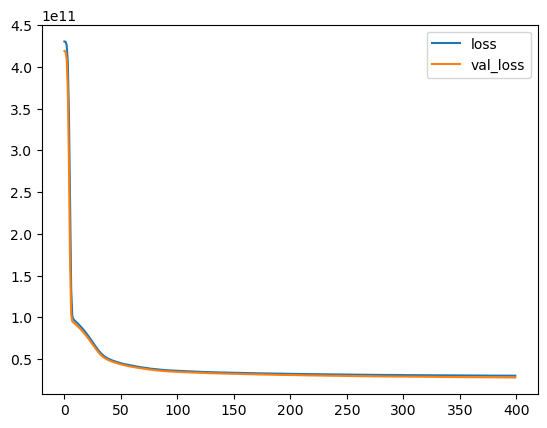

In [102]:
losses.plot()

#loss on training can be directly compared to the loss on the test set
#to see if we are overfitting to the training data.

In [104]:
#this is exactly what we want to see; there is a decrease in both the 
#training and test loss, and there is no increase in the validation
#loss. If the validation loss starts to increase while the training 
#loss continues to decrease, that means we are overfitting to the 
#training data. Since we were not overfitting, we could have kept going,
#but we can see that the decrease starts to slow after only 50.

In [105]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score

In [106]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 902us/step


In [107]:
predictions

array([[392190.12],
       [592370.44],
       [561566.75],
       ...,
       [377027.53],
       [558840.56],
       [679290.56]], dtype=float32)

In [108]:
mean_squared_error(y_test,predictions)

28147781702.192688

In [109]:
#this is a large value because it is the squared value of house prices

In [112]:
np.sqrt(mean_squared_error(y_test,predictions)) #RMSE

167773.00647658636

In [113]:
mean_absolute_error(y_test,predictions)

103421.30016034916

In [114]:
#on average, we are off by about $100,000

In [115]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [116]:
#mean is $540296, so we are off by about 20%

In [117]:
explained_variance_score(y_test,predictions)

#tells you how much variance is explained by the model.

0.7878790148646281

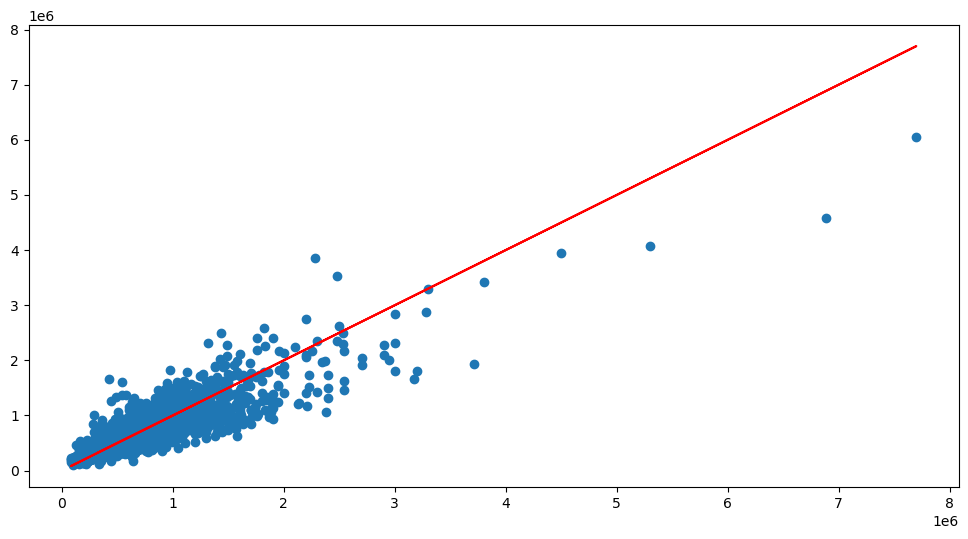

In [119]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r') #perfect prediction line

In [120]:
#we are being punished by the outlier very expensive houses, but the 
#model is good at predicting the prices of houses up to $2MM.

#It may be worth retraining the model to exclude the top 1% as we did
#with the longitude and latitude data

In [121]:
df.drop('price',axis=1).iloc[0]

#these are just the features of the very first house without the price

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [122]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [123]:
single_house = df.drop('price',axis=1).iloc[0]

In [124]:
single_house.values 

#numpy array but the shape is off, only one set of brackets

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [129]:
single_house.values.reshape(-1,19)

#-1 keeps the old dimensions along that axis

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [130]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

#scale the data down

In [131]:
model.predict(single_house)

1/1 [==============================] - 0s 17ms/step


array([[282853.28]], dtype=float32)

In [132]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [133]:
#we overshot by approximately $60k

In [134]:
non_top_1_perc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [135]:
df = non_top_1_perc

In [140]:
#will now go back through the steps to clean the data and scale it

In [142]:
df.drop('date',axis=1,inplace=True)

In [145]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
6329,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,47.5876,-122.204,2960,10347,2014,6
12271,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,47.5632,-122.215,3700,14486,2014,10
9166,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,47.5287,-122.220,3730,16560,2015,2
12565,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,47.6422,-122.157,3900,35237,2015,4
1150,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,47.7165,-122.259,2630,13868,2015,4


In [146]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21381.0,518367.480380,284942.837306,78000.0000,320000.0000,450000.0000,635000.0000,1.970000e+06
bedrooms,21381.0,3.363313,0.920045,1.0000,3.0000,3.0000,4.0000,3.300000e+01
bathrooms,21381.0,2.098592,0.745745,0.5000,1.5000,2.2500,2.5000,7.500000e+00
sqft_living,21381.0,2051.004256,861.142315,370.0000,1420.0000,1900.0000,2520.0000,7.730000e+03
sqft_lot,21381.0,14985.215939,40970.158332,520.0000,5027.0000,7576.0000,10545.0000,1.651359e+06
floors,21381.0,1.490319,0.538942,1.0000,1.0000,1.5000,2.0000,3.500000e+00
waterfront,21381.0,0.005332,0.072826,0.0000,0.0000,0.0000,0.0000,1.000000e+00
view,21381.0,0.216267,0.729313,0.0000,0.0000,0.0000,0.0000,4.000000e+00
condition,21381.0,3.408634,0.649342,1.0000,3.0000,3.0000,4.0000,5.000000e+00
grade,21381.0,7.627379,1.133104,3.0000,7.0000,7.0000,8.0000,1.300000e+01


In [147]:
X = df.drop('price',axis=1).values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.3, random_state=101)

In [148]:
scaler = MinMaxScaler()

In [149]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [150]:
X_train.shape

(14966, 19)

In [151]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [152]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
         batch_size=128, epochs=400)

Epoch 1/400
117/117 [==============================] - 1s 2ms/step - loss: 346874183680.0000 - val_loss: 356852695040.0000
Epoch 2/400
117/117 [==============================] - 0s 1ms/step - loss: 345576505344.0000 - val_loss: 351796985856.0000
Epoch 3/400
117/117 [==============================] - 0s 1ms/step - loss: 323167944704.0000 - val_loss: 297155985408.0000
Epoch 4/400
117/117 [==============================] - 0s 1ms/step - loss: 214095609856.0000 - val_loss: 131922649088.0000
Epoch 5/400
117/117 [==============================] - 0s 1ms/step - loss: 76386598912.0000 - val_loss: 56087031808.0000
Epoch 6/400
117/117 [==============================] - 0s 2ms/step - loss: 53809922048.0000 - val_loss: 54169956352.0000
Epoch 7/400
117/117 [==============================] - 0s 1ms/step - loss: 52720533504.0000 - val_loss: 53074903040.0000
Epoch 8/400
117/117 [==============================] - 0s 1ms/step - loss: 51705171968.0000 - val_loss: 52134809600.0000
Epoch 9/400
117/117 [===

117/117 [==============================] - 0s 1ms/step - loss: 22892048384.0000 - val_loss: 23743432704.0000
Epoch 69/400
117/117 [==============================] - 0s 1ms/step - loss: 22849564672.0000 - val_loss: 23737657344.0000
Epoch 70/400
117/117 [==============================] - 0s 2ms/step - loss: 22805882880.0000 - val_loss: 23775494144.0000
Epoch 71/400
117/117 [==============================] - 0s 2ms/step - loss: 22762465280.0000 - val_loss: 23633090560.0000
Epoch 72/400
117/117 [==============================] - 0s 2ms/step - loss: 22719174656.0000 - val_loss: 23601369088.0000
Epoch 73/400
117/117 [==============================] - 0s 2ms/step - loss: 22668632064.0000 - val_loss: 23569422336.0000
Epoch 74/400
117/117 [==============================] - 0s 2ms/step - loss: 22600884224.0000 - val_loss: 23615070208.0000
Epoch 75/400
117/117 [==============================] - 0s 2ms/step - loss: 22604296192.0000 - val_loss: 23469326336.0000
Epoch 76/400
117/117 [===============

Epoch 135/400
117/117 [==============================] - 0s 2ms/step - loss: 21213769728.0000 - val_loss: 22186080256.0000
Epoch 136/400
117/117 [==============================] - 0s 2ms/step - loss: 21186297856.0000 - val_loss: 22135361536.0000
Epoch 137/400
117/117 [==============================] - 0s 2ms/step - loss: 21183541248.0000 - val_loss: 22153074688.0000
Epoch 138/400
117/117 [==============================] - 0s 2ms/step - loss: 21166028800.0000 - val_loss: 22148671488.0000
Epoch 139/400
117/117 [==============================] - 0s 2ms/step - loss: 21180485632.0000 - val_loss: 22137483264.0000
Epoch 140/400
117/117 [==============================] - 0s 2ms/step - loss: 21145827328.0000 - val_loss: 22146152448.0000
Epoch 141/400
117/117 [==============================] - 0s 1ms/step - loss: 21150203904.0000 - val_loss: 22095876096.0000
Epoch 142/400
117/117 [==============================] - 0s 2ms/step - loss: 21129216000.0000 - val_loss: 22075113472.0000
Epoch 143/400
11

117/117 [==============================] - 0s 1ms/step - loss: 20817272832.0000 - val_loss: 21726228480.0000
Epoch 202/400
117/117 [==============================] - 0s 2ms/step - loss: 20791820288.0000 - val_loss: 21789278208.0000
Epoch 203/400
117/117 [==============================] - 0s 1ms/step - loss: 20824578048.0000 - val_loss: 21701199872.0000
Epoch 204/400
117/117 [==============================] - 0s 1ms/step - loss: 20812224512.0000 - val_loss: 21702385664.0000
Epoch 205/400
117/117 [==============================] - 0s 1ms/step - loss: 20808830976.0000 - val_loss: 21709701120.0000
Epoch 206/400
117/117 [==============================] - 0s 2ms/step - loss: 20825786368.0000 - val_loss: 21698818048.0000
Epoch 207/400
117/117 [==============================] - 0s 2ms/step - loss: 20819867648.0000 - val_loss: 21723817984.0000
Epoch 208/400
117/117 [==============================] - 0s 1ms/step - loss: 20812494848.0000 - val_loss: 21774141440.0000
Epoch 209/400
117/117 [=======

117/117 [==============================] - 0s 1ms/step - loss: 20613230592.0000 - val_loss: 21500164096.0000
Epoch 268/400
117/117 [==============================] - 0s 2ms/step - loss: 20621430784.0000 - val_loss: 21540272128.0000
Epoch 269/400
117/117 [==============================] - 0s 1ms/step - loss: 20608368640.0000 - val_loss: 21521772544.0000
Epoch 270/400
117/117 [==============================] - 0s 1ms/step - loss: 20598872064.0000 - val_loss: 21593782272.0000
Epoch 271/400
117/117 [==============================] - 0s 2ms/step - loss: 20621400064.0000 - val_loss: 21481842688.0000
Epoch 272/400
117/117 [==============================] - 0s 1ms/step - loss: 20600268800.0000 - val_loss: 21522374656.0000
Epoch 273/400
117/117 [==============================] - 0s 2ms/step - loss: 20634826752.0000 - val_loss: 21511419904.0000
Epoch 274/400
117/117 [==============================] - 0s 2ms/step - loss: 20600141824.0000 - val_loss: 21498857472.0000
Epoch 275/400
117/117 [=======

117/117 [==============================] - 0s 2ms/step - loss: 20421517312.0000 - val_loss: 21254539264.0000
Epoch 334/400
117/117 [==============================] - 0s 2ms/step - loss: 20407420928.0000 - val_loss: 21320296448.0000
Epoch 335/400
117/117 [==============================] - 0s 2ms/step - loss: 20401733632.0000 - val_loss: 21268811776.0000
Epoch 336/400
117/117 [==============================] - 0s 2ms/step - loss: 20399984640.0000 - val_loss: 21368397824.0000
Epoch 337/400
117/117 [==============================] - 0s 2ms/step - loss: 20419108864.0000 - val_loss: 21263828992.0000
Epoch 338/400
117/117 [==============================] - 0s 2ms/step - loss: 20392767488.0000 - val_loss: 21235914752.0000
Epoch 339/400
117/117 [==============================] - 0s 2ms/step - loss: 20404600832.0000 - val_loss: 21353834496.0000
Epoch 340/400
117/117 [==============================] - 0s 2ms/step - loss: 20428019712.0000 - val_loss: 21314193408.0000
Epoch 341/400
117/117 [=======

117/117 [==============================] - 0s 2ms/step - loss: 20059176960.0000 - val_loss: 20915335168.0000
Epoch 400/400
117/117 [==============================] - 0s 2ms/step - loss: 20064184320.0000 - val_loss: 20920631296.0000


In [153]:
losses=pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,3.468742e+11,3.568527e+11
1,3.455765e+11,3.517970e+11
2,3.231679e+11,2.971560e+11
3,2.140956e+11,1.319226e+11
4,7.638660e+10,5.608703e+10
...,...,...
395,2.007705e+10,2.096747e+10
396,2.006026e+10,2.093390e+10
397,2.007156e+10,2.105266e+10
398,2.005918e+10,2.091534e+10


<AxesSubplot:>

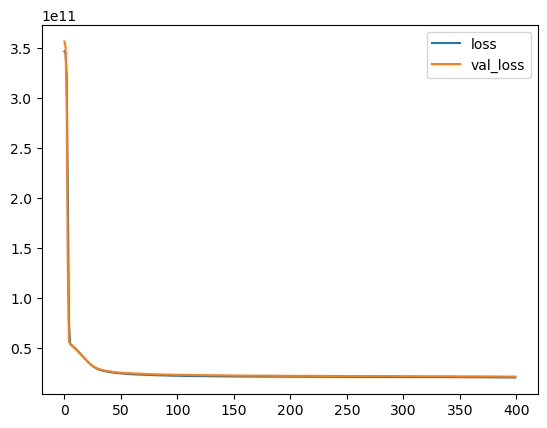

In [154]:
losses.plot() #same behavior as last time, which is ideal.

In [155]:
predictions = model.predict(X_test)

201/201 [==============================] - 0s 736us/step


In [156]:
mean_squared_error(y_test,predictions)

20920628469.78155

In [157]:
np.sqrt(mean_squared_error(y_test,predictions))

144639.65040673167

In [158]:
mean_absolute_error(y_test,predictions)

97392.21337685113

In [160]:
df['price'].describe()

count    2.138100e+04
mean     5.183675e+05
std      2.849428e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.350000e+05
max      1.970000e+06
Name: price, dtype: float64

In [161]:
#performs slightly better, but still 19% off

In [162]:
explained_variance_score(y_test,predictions)


0.7462002253959934

In [163]:
#model explains 74% of variance instead of 78% last time

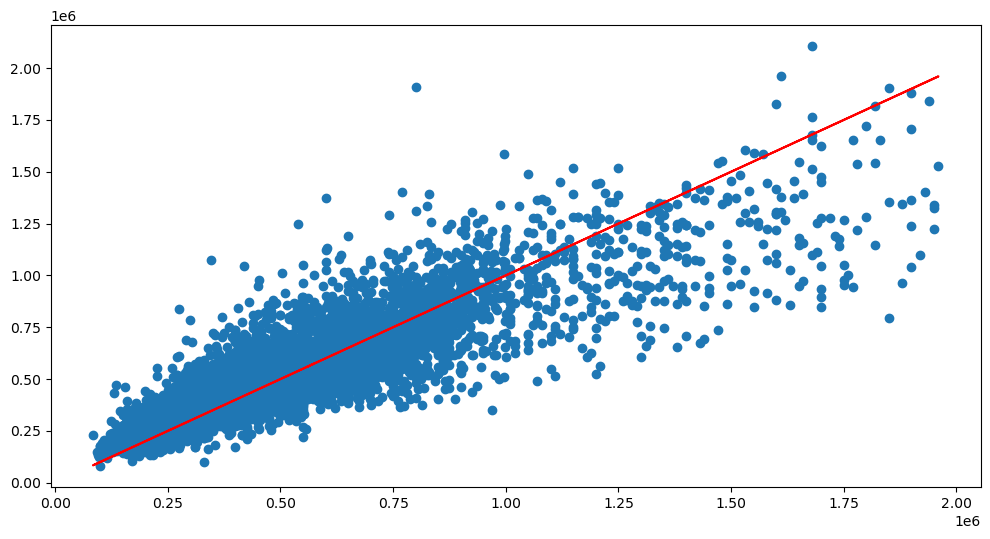

In [164]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r') #perfect prediction line